In [1]:
%matplotlib inline


Creating a GeoDataFrame from a DataFrame with coordinates
---------------------------------------------------------

Create a ``GeoDataFrame`` when starting from a *regular* ``DataFrame`` that has coordinates in WKT format.


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

We use the shapefile set ``states_21basic`` to map the US States and get their geometries. Lets load the data into a ``GeoDataFrame``:

In [3]:
usa = geopandas.read_file("states_21basic/states.shp")

Check out the ``head`` of the dataframe:

In [4]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


The geometry column contains POLYGON shapes! These polygons are a tuple of longitude/latitude points that make up the border of each US state. We’ve already got enough info to make a basic plot:

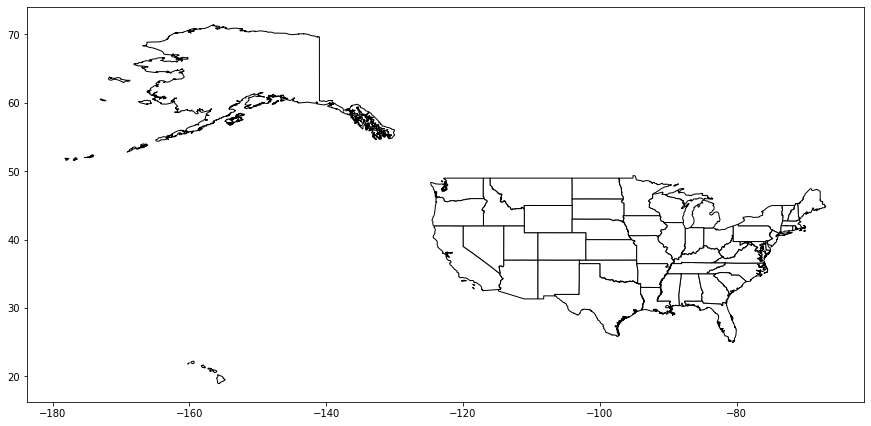

In [5]:
usa.plot(color='white', edgecolor='black')

You can check out individual states:

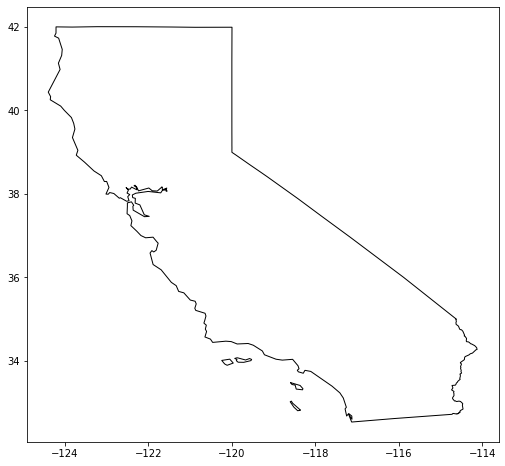

In [6]:
usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')

We use the ``geo_sparql_query`` module to retrieve the collection of WKT we would like to plot.

In [7]:
from geo_sparql_query import get_gid_wkt, get_osm_df

gid_wkt = get_gid_wkt(1)
wkt_df = pd.DataFrame({'Instance': 1, 'Coordinates': gid_wkt})

A ``GeoDataFrame`` needs a ``shapely`` object. We use ``shapely.wkt`` sub-module to parse wkt format:

In [8]:
from shapely import wkt

wkt_df['Coordinates'] = wkt_df['Coordinates'].apply(wkt.loads)

Lets inspected the ``GeoDataFrame``:

In [9]:
gdf = geopandas.GeoDataFrame(wkt_df, geometry='Coordinates')
gdf.insert(0, 'OSM', 0)

print(gdf.head())

   OSM  Instance                                        Coordinates
0    0         1  MULTILINESTRING ((-121.99552 41.72220, -121.99...


We can plot our ``GeoDataFrame`` on top of a state:

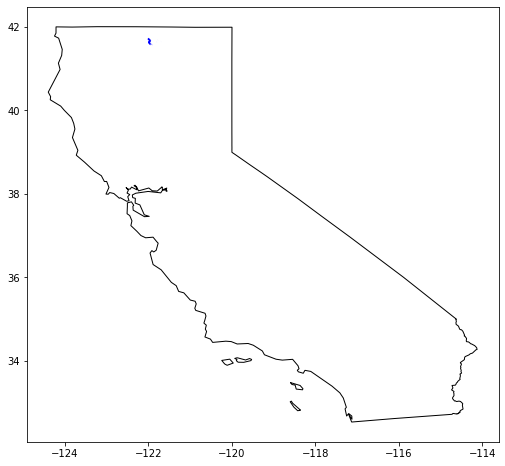

In [23]:
ax = usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue')
plt.show()

Or as a standalone (no state borders):

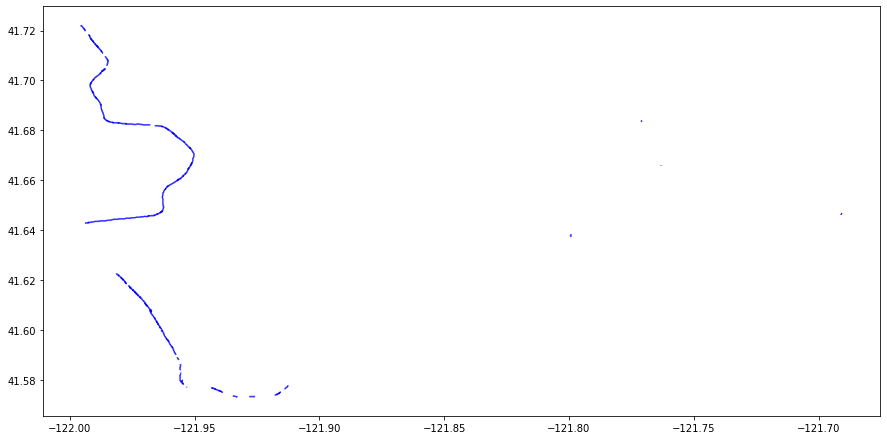

In [26]:
gdf.plot(color='blue')

In [12]:
osm_df = get_osm_df(1)

In [13]:
osm_df['Coordinates'] = osm_df['Coordinates'].apply(wkt.loads)
osm_gdf = geopandas.GeoDataFrame(osm_df, geometry='Coordinates')
osm_gdf.insert(0, 'OSM', 1)

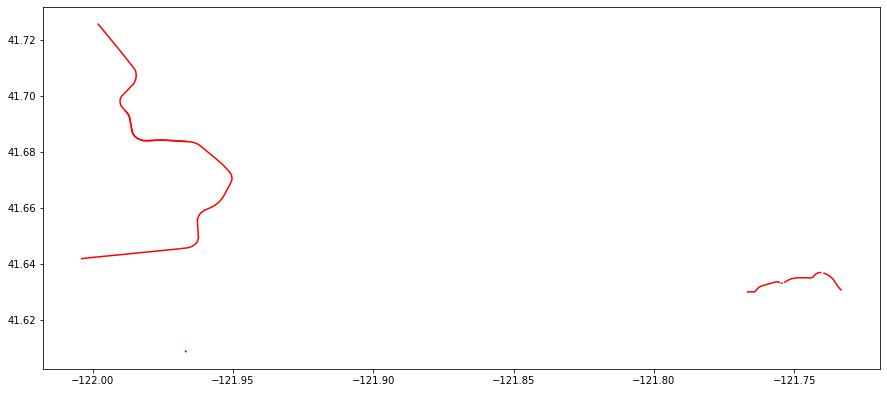

In [27]:
osm_gdf.plot(color='red')

In [28]:
frames = [gdf, osm_gdf]
result = pd.concat(frames)
print(result.head())

   OSM                                        Instance  \
0    0                                               1   
0    1  http://linkedgeodata.org/triplify/way177559138   
1    1   http://linkedgeodata.org/triplify/way10661144   
2    1  http://linkedgeodata.org/triplify/way249503576   
3    1   http://linkedgeodata.org/triplify/way10670872   

                                         Coordinates  
0  MULTILINESTRING ((-121.99552 41.72220, -121.99...  
0  LINESTRING (-121.74039 41.63694, -121.74110 41...  
1  LINESTRING (-121.96714 41.60914, -121.96674 41...  
2  LINESTRING (-121.98591 41.68717, -121.98566 41...  
3  LINESTRING (-121.96900 41.64549, -121.96962 41...  


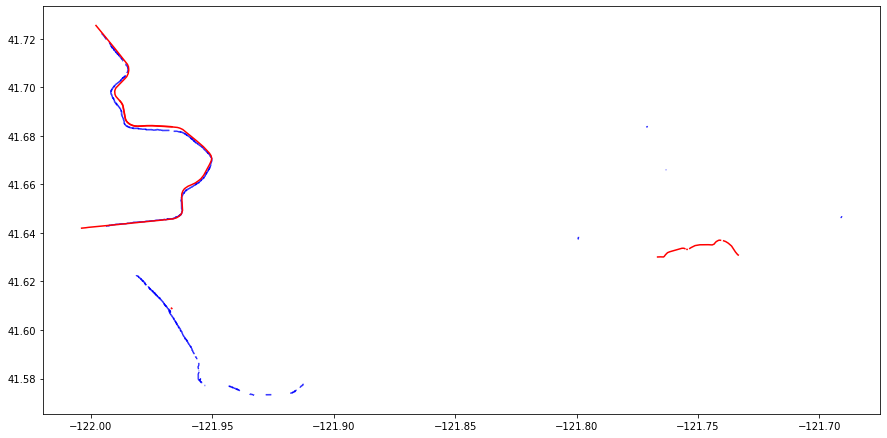

In [29]:
result.plot(column='OSM', cmap='bwr')